<a href="https://colab.research.google.com/github/Israwss/Datos-Masivos-II/blob/main/DMII_U1_3_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datos Masivos II

## Ciencia de datos - IIMAS


### Unidad 1. Reducción de dimensionalidad

#### 1.3. Principal Component Analysis

# Principal Component Analysis

Dada una serie de datos compuestos por $n$ observaciones y $m$ características, los cuales hacemos pasar por una caja negra que en principio no sabemos que contiene y esta nos devuelve $n$ observaciones con $k$ características nuevas.

$$
A\in \Re ^{nxm} \rightarrow \mbox{ \mancube} \rightarrow A' \in \Re^{nxk}
$$

$(k<m)$

Dependiendo del algoritmo en mancube podemos obtener un conjunto diferente, esto depende de la función que optimice o priorice el algoritmo utilizado.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class PCA:
  #Inicia PCA con un numero de componentes
  def __init__(self, n_components):
    self.n_components_ = n_components

  #Ajusta el modelo en los datos para obtener:
  def fit(self, X):
    self.means_ = X.mean(axis=0) #Calcula la media de cada caracteristica
    devs = X - self.means_ #Centra los datos

    cov = (devs.T @ devs) / (X.shape[0] - 1) #Calcula la matriz de covarianza
    l, u = np.linalg.eig(cov) #Calcula los eigenvalores y eigenvectores

    lts = l.argsort()[::-1] #Ordena los eigenvalores de forma desendente
    u = u[:, lts] #Ordena los eigenvectores de acuerdo a sus eigenvalores
    l = l[lts]

    self.components_ = u[:, :self.n_components_] #Almacena los componentes principales seleccionados
    self.vars_ = l[:self.n_components_] #Almacenar variaciones explicadas por componentes principales

  #Transforma los datos proyectandolos en PC
  def transform(self, X):
    return (X - self.means_) @ self.components_

  #Trnasformación inversa de los datos para proyectarlos en el espacio original
  def inverse_transform(self, X_reduced):
    return X_reduced @ self.components_.T + self.means_

In [ ]:
class PCASVD:
  def __init__(self, n_components):
    self.n_components_ = n_components

  def fit(self, X):
    self.means_ = X.mean(axis=0) #Calcula las medias de las caracteristicas
    X -= self.means_ #Centra los datos

    U, S, V = np.linalg.svd(X) #Calcula Singular Value Descomposition
    self.vars_ = S[:self.n_components_]**2 / (X.shape[0] - 1) #Almacenar variaciones explicadas por componentes principales
    self.components_ = V[:self.n_components_].T #Almacena los componentes principales seleccionados

  #Transforma los datos proyectandolos en PC
  def transform(self, X):
    return (X - self.means_) @ self.components_

  #Trnasformación inversa de los datos para proyectarlos en el espacio original
  def inverse_transform(self, X_reduced):
    return X_reduced @ self.components_.T + self.means_

## Conjunto de datos de Iris
Apliquemos el PCA que acabamos de programar en conjunto de datos de flores iris. Elegimos los atributos de ancho y largo sepal y visualizamos el conjunto.

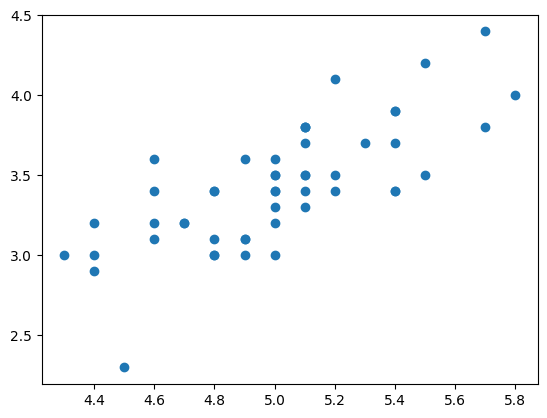

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris() #Lee el dataset de iris
p2d = iris['data'][:,:2] #Toma solo las 2 primera columnas
p2d = p2d[iris['target']==0] #Filtra las muestras con etiqueta 0
plt.plot(p2d[:, 0], p2d[:, 1], 'o') #Grafica los puntos en 2D
plt.show()

Encontramos sus 2 componentes principales

In [ ]:
pca2d = PCA(2) #Crea un modelo de PCA para 2 componentes
pca2d.fit(p2d) #Corremos el modelo PCA en los datos de 2D

Visualizamos los componentes principales encontrados

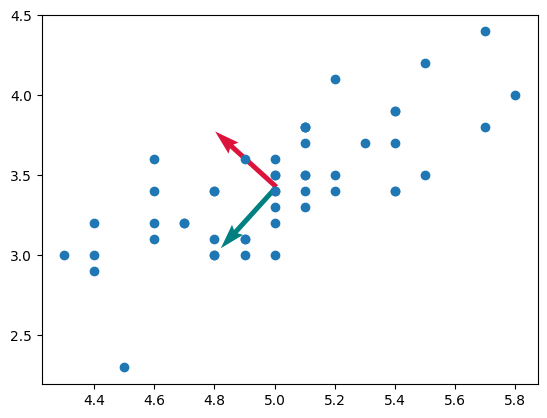

In [ ]:
plt.plot(p2d[:, 0], p2d[:, 1], 'o') #Graficamos el dataset 2D original
colors = ['teal', 'crimson']
for c,u in zip(colors, pca2d.components_):
  #Encontramos el centro y trazamos una flecha que representa cada dirección de cada PC
  means = p2d.mean(axis=0)
  plt.quiver(means[0], means[1], u[0], u[1], width=0.01,
             scale=6,
             color=c)
plt.show()

Desplegamos sus valores.

In [ ]:
print(pca2d.components_) #Componentes principales
print(pca2d.vars_) #Las variaciones explicadas por cada CP

[[-0.67174957 -0.74077832]
 [-0.74077832  0.67174957]]
[0.23366074 0.03427804]


Hacemos los mismo con la implementación de PCA por SVD.

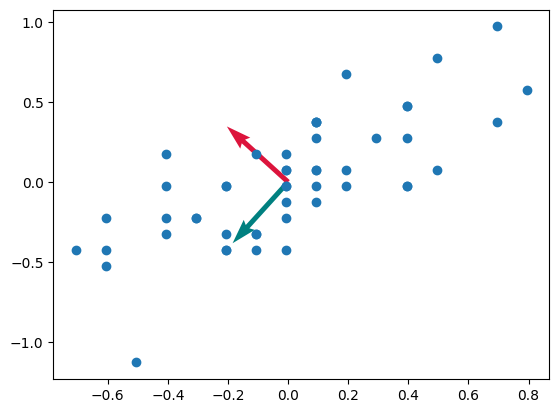

In [ ]:
pca2dsvd = PCASVD(2) # Creamos el modelo con SVD
pca2dsvd.fit(p2d) #Realizamos el modelo con los datos "D"
plt.plot(p2d[:, 0], p2d[:, 1], 'o')
colors = ['teal', 'crimson']
for c,u,v in zip(colors, pca2dsvd.components_, pca2dsvd.vars_):
  means = p2d.mean(axis=0)
  plt.quiver(means[0], means[1], u[0], u[1], width=0.01, scale=6, color=c)
plt.show()

In [ ]:
print(pca2dsvd.components_)
print(pca2dsvd.vars_)

[[-0.67174957 -0.74077832]
 [-0.74077832  0.67174957]]
[0.23366074 0.03427804]


Reducimos dimensiones del conjunto de ejemplos de 3 (ancho y largo del sépalo y ancho del pétalo).

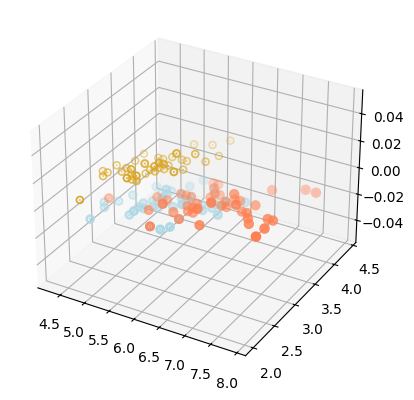

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

p3d = iris['data'][:, :3] #Tomamos un subconjunto de 3D

colores=['goldenrod', 'lightblue', 'coral']
for i,c in enumerate(colores):
  plt.scatter(p3d[iris['target']==i,0], p3d[iris['target']==i, 1], p3d[iris['target']==i, 2], lw=5, color=c) #Lo graficamos de acuerdo a cada uno de las especies de flores

In [ ]:
#Comparación entre PCA con la matriz de covarianza, SVD y la implementación PCA de sklearn
pca3d_2c = PCA(2)
pca3d_2c.fit(p3d)
print(pca3d_2c.components_)
print(pca3d_2c.vars_)

pcasvd3d_2c = PCASVD(2)
pcasvd3d_2c.fit(p3d)
print(pcasvd3d_2c.components_)
print(pcasvd3d_2c.vars_)

from sklearn.decomposition import PCA as SKPCA
skpca = SKPCA(n_components=2, whiten=False)
skpca.fit(p3d)
print(skpca.components_)
print(skpca.explained_variance_)

[[-0.38983343  0.63922328]
 [ 0.09100801  0.74305866]
 [-0.91637735 -0.19813487]]
[3.69111979 0.24137727]
[[ 0.38983343 -0.63922328]
 [-0.09100801 -0.74305866]
 [ 0.91637735  0.19813487]]
[3.69111979 0.24137727]
[[ 0.38983343 -0.09100801  0.91637735]
 [ 0.63922328  0.74305866 -0.19813487]]
[3.69111979 0.24137727]


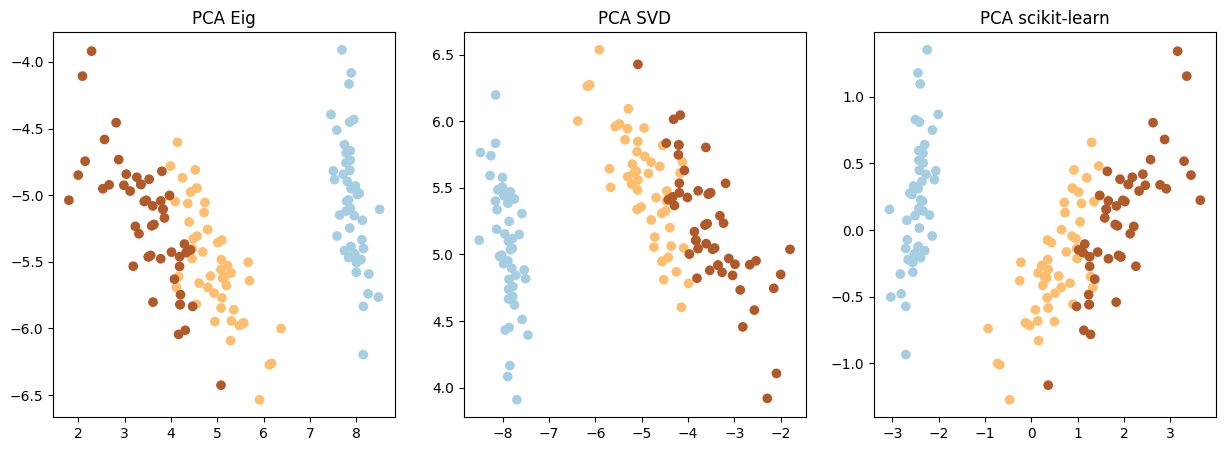

In [ ]:
#Ahora se graficaran los tres metodos para compararlos
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

#Transformamos los datos usando las diferentes implementaciones de PCA
proj = pca3d_2c.transform(p3d)
projsvd = pcasvd3d_2c.transform(p3d)
skproj = skpca.transform(p3d)

from matplotlib import cm

axs[0].scatter(proj[:, 0], proj[:, 1], c=iris.target, cmap=cm.Paired)
axs[0].set_title('PCA Eig')
axs[1].scatter(projsvd[:, 0], projsvd[:, 1], c=iris.target, cmap=cm.Paired)
axs[1].set_title('PCA SVD')
axs[2].scatter(skproj[:, 0], skproj[:, 1], c=iris.target, cmap=cm.Paired)
axs[2].set_title('PCA scikit-learn')
plt.show()

## Conjunto de datos de imágenes de dígitos
Cargamos y visualizamos algunos ejemplos del conjunto de imágenes de dígitos



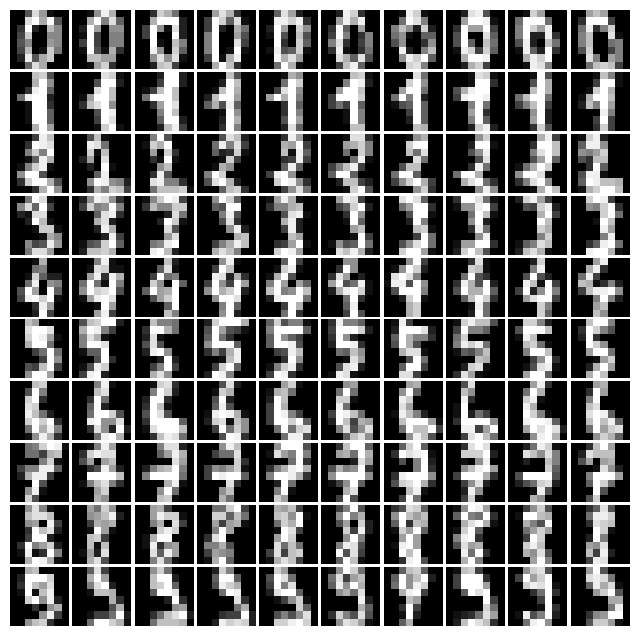

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec


def show_images(images, targets, n_targets=False, n_samples=10, imshape=(8,8), figsize=(8,8)):

  n_targets = n_targets if n_targets else targets.max() + 1 #Numero de clases

  plt.figure(figsize=figsize)
  gs = gridspec.GridSpec(n_targets, n_samples) #crea el grid
  gs.update(wspace=0.05, hspace=0.05) #espacio entre los subplots
  for i in range(n_targets):
    target_spec_imgs = images[targets==i] #Obtiene las imagenes de cada clase
    for j in range(n_samples):
      ax = plt.subplot(gs[i * n_samples + j]) #Adiciona al subplot
      ax.imshow(target_spec_imgs[j].reshape(imshape), cmap=plt.cm.gray, interpolation='nearest') #muestra la imagen
      ax.axis('off')
      ax.set_xticklabels([])
      ax.set_yticklabels([])
      ax.set_aspect('equal')
  plt.show()

db = load_digits() #Lee los datos de los digitos

show_images(db.images, db.target) #Muestra un subconjunto de imagenes de cada clase

Aplicamos PCA con 2 componentes a este conjunto

In [ ]:
imgs = db['data'] #Obtenemos la matriz de datos
impca2 = PCA(2) #Definimos el modelos de PCA con dos componentes
impca2.fit(imgs) #Aplicamos el modelo
reduced2 = impca2.transform(imgs) #transformamos los datos

Visualizamos los datos proyectados en el subespacio

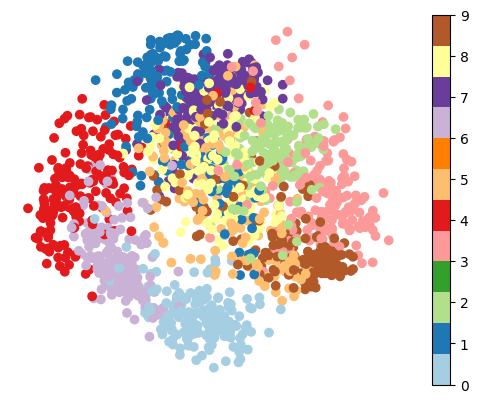

In [ ]:
plt.scatter(reduced2[:, 0], reduced2[:, 1], c=db.target, cmap="Paired") #Utlizamos las etiquetas para mostrar las clases
plt.colorbar()
plt.axis('off')
plt.show()

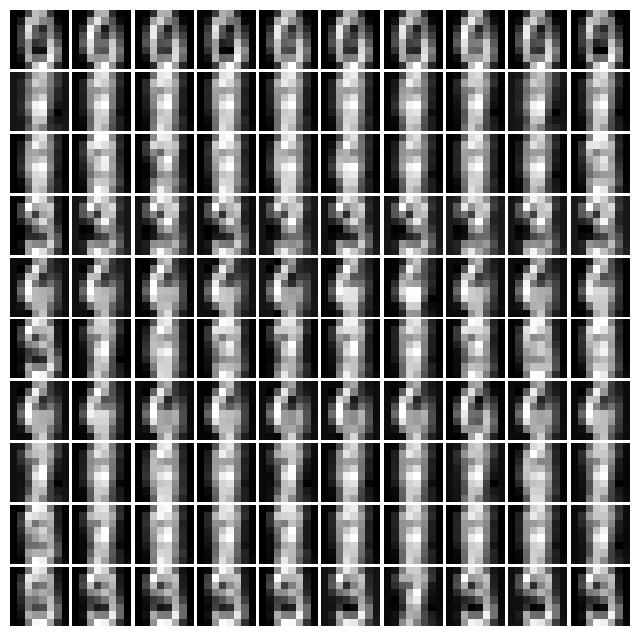

In [ ]:
rec2 = impca2.inverse_transform(reduced2) #Reconstruimos la información a partir de los dos PC
show_images(rec2.reshape(rec2.shape[0], 8, 8), db.target)

Aplicamos PCA con 40 componentes para comparar las reconstrucciones

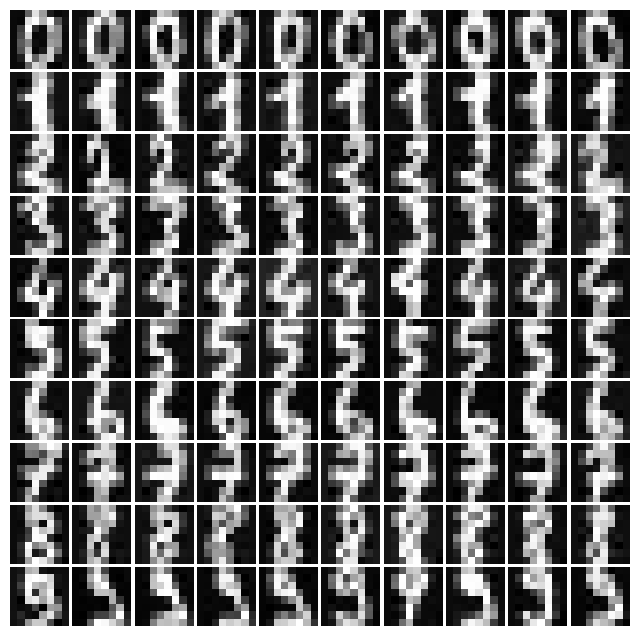

In [ ]:
impca40 = PCA(40) #Definimos el modelo para 40 PC
impca40.fit(imgs)
reduced40 = impca40.transform(imgs)
rec40 = impca40.inverse_transform(reduced40)
show_images(rec40.reshape(rec40.shape[0], 8, 8), db.target)

Una estrategia para elegir el número $K$ de componentes principales es analizar el porcentaje de la varianza explicada. Visualicemos el radio de la varianza explicada por cada componente y su porcentaje acumulado.Podemos observar que los primeros 21 componentes principales explican más del 90% de la varianza.

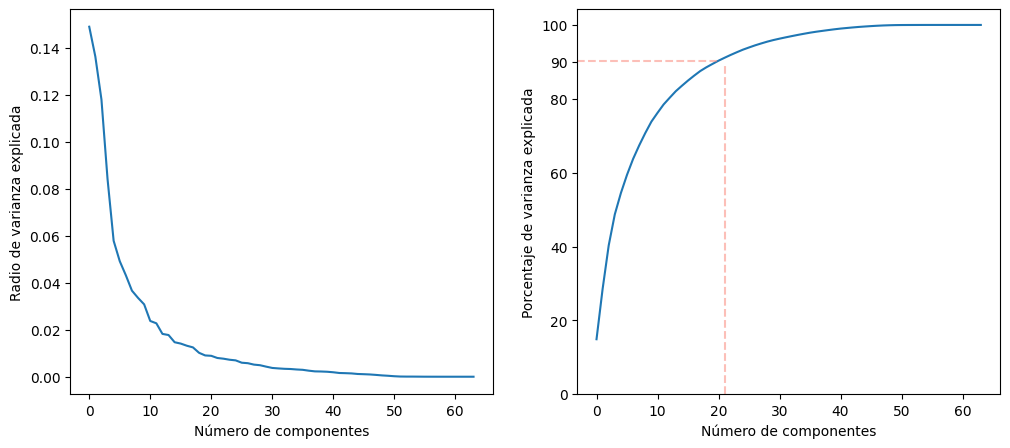

In [ ]:
#Vamos a probar hasta 64 PC
m = PCA(64)
m.fit(imgs)
#Calcumos la varianza explicada
percent = (m.vars_.cumsum() / m.vars_.sum()) * 100

#Grafica de la varianza explicada para cada componente
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axs[0].plot(m.vars_ / m.vars_.sum())
axs[0].set_xlabel(u'Número de componentes')
axs[0].set_ylabel(u'Radio de varianza explicada')

#Grafica de la varianza explicada acumulada
axs[1].plot(percent)
axs[1].set_xlabel(u'Número de componentes')
axs[1].set_ylabel(u'Porcentaje de varianza explicada')
axs[1].axvline(x=np.argwhere(percent>=90)[0] + 1, ymin=0, ymax=0.86, color='salmon',alpha=0.5, ls='--')
axs[1].axhline(y=percent[np.argwhere(percent>=90)][0], xmin=0, xmax=0.33, color='salmon', alpha=0.5, ls='--')
axs[1].set_yticks([0,20,40,60,80,90,100])

plt.show()

## Reconocimiento de rostros con PCA
Ahora vamos a explorar un método sencillo de reconocimiento de rostros usando PCA, conocido como _eigenfaces_.

Primero cargamos el conjunto de imágenes de rostros de Olivetti Research Laboratory, el cual contiene imágenes de $64\times 64$ de 40 sujetos distintos.

Visualicemos las imágenes de 10 sujetos.

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


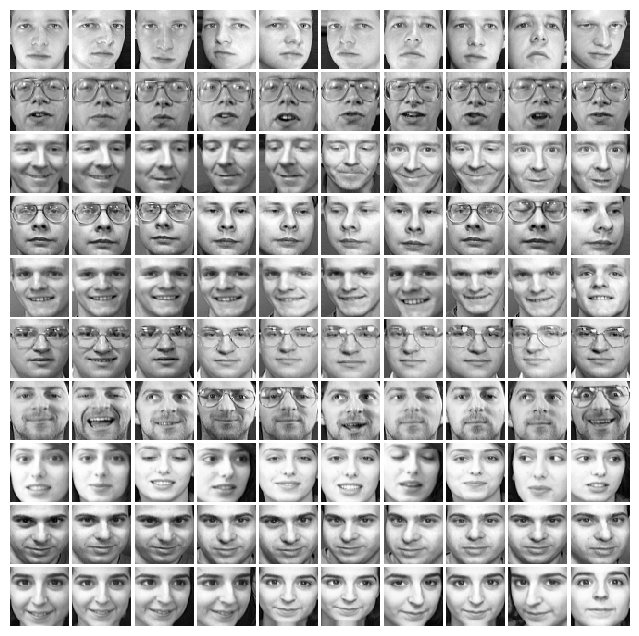

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

#Leemos de Olivetti face dataset
orl  = fetch_olivetti_faces()
show_images(orl.images, orl.target, n_targets=10, imshape=orl.images[0].shape)

Dividimos el conjunto en subconjuntos de entrenamiento y validación

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(orl.data, orl.target, test_size=0.3, random_state=42)

Tomemos dos imágenes de un mismo rostro y de dos rostros distintos y comparémoslas.

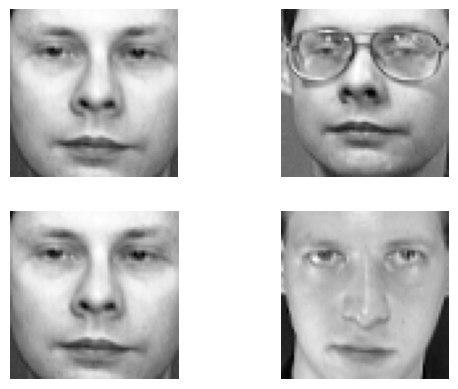

In [ ]:
plt.subplot(2,2,1)
plt.imshow(X_train[y_train==3][0].reshape(64, 64), cmap='gray')
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(X_train[y_train==3][4].reshape(64, 64), cmap='gray')
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(X_train[y_train==3][0].reshape(64, 64), cmap='gray')
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(X_train[y_train==0][1].reshape(64, 64), cmap='gray')
plt.axis('off')
plt.show()

Convertimos las imágenes a vectores de 4096 dimensiones y calculamos la distancia euclidiana entre ambos pares. Recuerde que las imagenes son 64x64

In [ ]:
#Distancia euclidiana entre dos caras de la misma persona
dist_sub3_to_sub3 = np.linalg.norm(X_test[y_test==3][2] - X_test[y_test==3][3])

#Distancia euclidiana entre dos caras de diferentes personas
dist_sub3_to_sub4 = np.linalg.norm(X_test[y_test==3][0] - X_test[y_test==4][1])
print(dist_sub3_to_sub3)
print(dist_sub3_to_sub4)

8.3137045
8.281011


Como podemos observar la distancia entre las imágenes del mismo rostro es mayor a la de rostros distintos en el espacio de píxeles, por lo que no sería adecuado para el reconocimiento usar esta representación. Una forma más adecuada de representar las imágenes de los rostros es a través de sus componentes principales.

Apliquemos PCA a nuestro conjunto y visualicemos los componentes principales (_eigenfaces_).

In [ ]:
#Creamos el modelo de PCA
eigenfaces = PCA(20)
eigenfaces.fit(X_train)
X_test_proj = eigenfaces.transform(X_test) #Proyectamos las imagenes a los componentes eigenface

Calculemos la distancia euclidiana de las proyecciones de las imágenes anteriores.

In [ ]:
dist_sub3_to_sub3_proj = np.linalg.norm(X_test_proj[y_test==3][2] - X_test_proj[y_test==3][3])
dist_sub3_to_sub4_proj = np.linalg.norm(X_test_proj[y_test==3][0] - X_test_proj[y_test==4][1])
print(dist_sub3_to_sub3_proj)
print(dist_sub3_to_sub4_proj)

4.908253
6.046197


Visualizamos los _eigenfaces_.

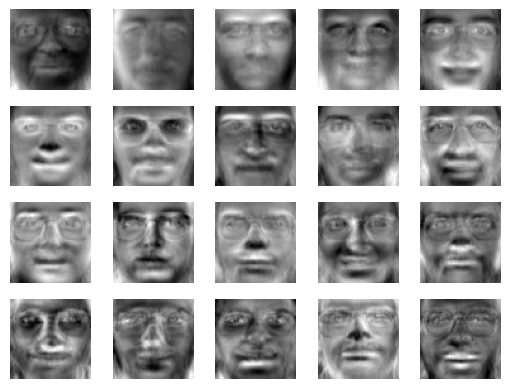

In [ ]:
for i in range(eigenfaces.n_components_):
  plt.subplot(4, 5, i+1)
  plt.imshow(eigenfaces.components_.T[i].reshape(64, 64), cmap='gray')
  plt.axis('off')

plt.show()

Finalmente comparamos ambas representaciones para reconocimiento de rostros entrenando y evaluando clasificadores basados en máquinas de vectores de soporte.

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

def entrena_evalua(X, y, ClasePCA, n_components):
  px_scores = []
  ef_scores = []

  #Cross validation
  cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3)
  for ind_ent, ind_val in cv.split(X, y):

    #modelo basado en pixeles
    c1 = SGDClassifier() #Stochastic Gradient Descent Classifier.
    c1.fit(X[ind_ent], y[ind_ent])
    px_scores.append(c1.score(X[ind_val], y[ind_val]))

    #Modelo basado en eigenface
    ef = ClasePCA(n_components)
    ef.fit(X[ind_ent])
    X_ent_proj = ef.transform(X[ind_ent])
    X_val_proj = ef.transform(X[ind_val])

    c2 = SGDClassifier()
    c2.fit(X_ent_proj, y[ind_ent])
    ef_scores.append(c2.score(X_val_proj, y[ind_val]))

  return px_scores, ef_scores

pxsc, efsc = entrena_evalua(orl.data, orl.target, PCA, n_components=50)

print(f'Exactitud promedio con píxeles: {np.mean(pxsc)} (std = {np.std(pxsc)})')
print(f'Exactitud promedio con eigenfaces: {np.mean(efsc)} (std = {np.std(efsc)})')

Exactitud promedio con píxeles: 0.6891666666666666 (std = 0.16233752561321801)
Exactitud promedio con eigenfaces: 0.8883333333333333 (std = 0.029391986814247355)
